In [2]:
import pandas as pd
from matplotlib import pyplot as plt



In [3]:
mon = {'january':1,"february":2,"march":3,"april":4,"may":5,"june":6,"july":7,"august":8,"september":9,"october":10,"november":11,'december':12}


df = pd.read_csv('final_import.csv')

'''
import_qty = list(df['Quantity'])
import_qty.reverse()

plt.title("Import quantity monthly from 2011-2018")
plt.plot(import_qty)
plt.show()
'''


year = [int("20"+''.join(list(i)[-2:])) for i in df["Time"]]
df["Year"] = year

df["Month"] = [mon[''.join(list(i)[:-2])] for i in df["Time"]]

#df.sort_values(by=['Year','Month'])
#df.head()

#print(df[df['Year']==2011])

arranged_years = []
arranged_months = []
arranged_opec = []
arranged_usb = []
arranged_barrels = []
arranged_qty = []

for i in range(2011,2019):
    
    new_df = df[df['Year']==i]
    arranged_years.append(list(new_df["Year"]))
    arranged_months.append(list(new_df["Month"]))
    arranged_opec.append(list(new_df["opec_barrels"]))
    arranged_usb.append(list(new_df["US_barrels"]))
    arranged_barrels.append(list(new_df["barrels"]))
    arranged_qty.append(list(new_df["Quantity"]))

#print(arranged_years[0])

arr_years = []
arr_months = []
arr_opec = []
arr_usb = []
arr_barrels = []
arr_qty = []

for i in arranged_years:
    for j in i:
        arr_years.append(j)

for i in arranged_months:
    for j in i:
        arr_months.append(j)

for i in arranged_opec:
    for j in i:
        arr_opec.append(j)

for i in arranged_usb:
    for j in i:
        arr_usb.append(j)

for i in arranged_barrels:
    for j in i:
        arr_barrels.append(j)
for i in arranged_qty:
    for j in i:
        arr_qty.append(j)

        
        
final_df = pd.DataFrame({'Year':arr_years,'Month':arr_months,'Barrels':arr_barrels,'Quantity':arr_qty,'OPEC_barrels':arr_opec,'US_barrels':arr_usb})
final_df = final_df[['Year','Month','Barrels','Quantity','OPEC_barrels','US_barrels']]
final_df.to_csv("imports_updated.csv", sep=',', encoding='utf-8')


    Unnamed: 0  Year  Month     Barrels  Quantity  OPEC_barrels  US_barrels
9            9  2012      1  1177576400     17017  1.176653e+09    923000.0
10          10  2012      2   949354800     13719  9.482178e+08   1137000.0
11          11  2012      3  1057998800     15289  1.057421e+09    578000.0
12          12  2012      4  1024782800     14809  1.023985e+09    798000.0
13          13  2012      5  1081388400     15627  1.080360e+09   1028000.0


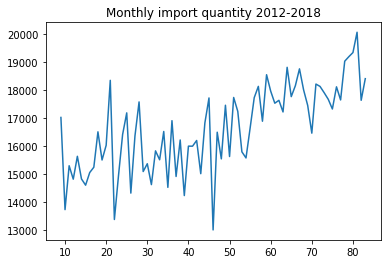

In [4]:

df = pd.read_csv('imports_updated.csv')

df = df[df['Year']>2011]

print(df.head())

qty = df["Quantity"]

plt.title("Monthly import quantity 2012-2018")
plt.plot(qty)
plt.show()


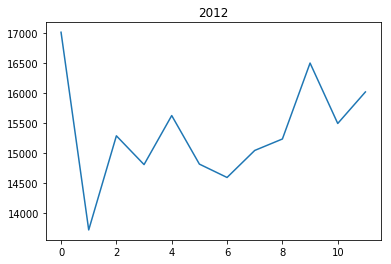

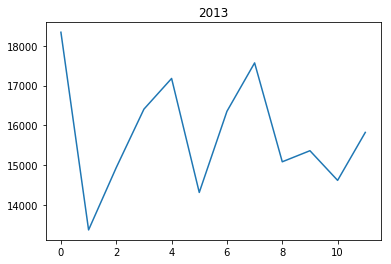

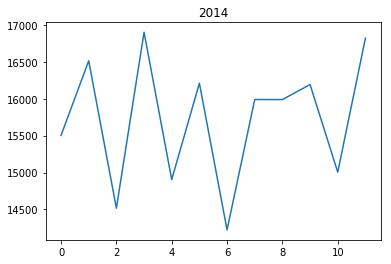

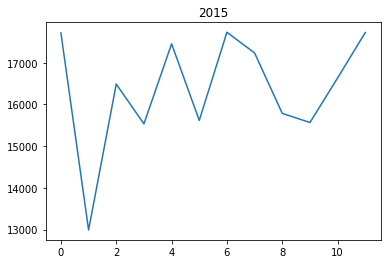

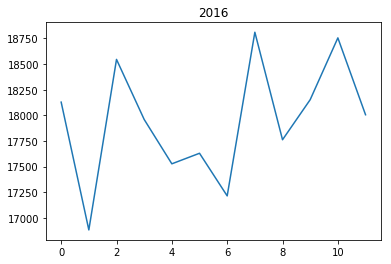

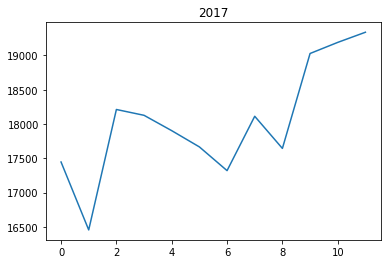

In [9]:
for i in range(2012,2018):
    new_df = df[df['Year']==i]
    qty = new_df['Quantity']
    plt.title(i)
    plt.plot([j for j in range(len(qty))],qty)
    plt.show()
    

In [13]:
df = pd.read_csv('imports_updated.csv')

l = list(df['Quantity'])

change = []

for i in range(1,len(l)):
    if(l[i]>l[i-1]):
        change.append((int(df.loc[i]["Year"]),int(df.loc[i]["Month"]),'increase'))
    else:
        change.append((int(df.loc[i]["Year"]),int(df.loc[i]["Month"]),'decrease'))

print(change)




[(2011, 5, 'decrease'), (2011, 6, 'increase'), (2011, 7, 'decrease'), (2011, 8, 'increase'), (2011, 9, 'decrease'), (2011, 10, 'decrease'), (2011, 11, 'increase'), (2011, 12, 'decrease'), (2012, 1, 'increase'), (2012, 2, 'decrease'), (2012, 3, 'increase'), (2012, 4, 'decrease'), (2012, 5, 'increase'), (2012, 6, 'decrease'), (2012, 7, 'decrease'), (2012, 8, 'increase'), (2012, 9, 'increase'), (2012, 10, 'increase'), (2012, 11, 'decrease'), (2012, 12, 'increase'), (2013, 1, 'increase'), (2013, 2, 'decrease'), (2013, 3, 'increase'), (2013, 4, 'increase'), (2013, 5, 'increase'), (2013, 6, 'decrease'), (2013, 7, 'increase'), (2013, 8, 'increase'), (2013, 9, 'decrease'), (2013, 10, 'increase'), (2013, 11, 'decrease'), (2013, 12, 'increase'), (2014, 1, 'decrease'), (2014, 2, 'increase'), (2014, 3, 'decrease'), (2014, 4, 'increase'), (2014, 5, 'decrease'), (2014, 6, 'increase'), (2014, 7, 'decrease'), (2014, 8, 'increase'), (2014, 9, 'decrease'), (2014, 10, 'increase'), (2014, 11, 'decrease'),

In [25]:
import sqlite3 as sql

conn = sql.connect('trend.db')

oil_command = "select oil_trend from month"
import_command = "select import from month"


oil_trend = list(conn.execute(oil_command))
oil_trend = [i[0] for i in oil_trend]
import_trend = list(conn.execute(import_command))
import_trend = [i[0] for i in import_trend]
#print(oil_trend)
#print(import_trend)


inc_up = 0
inc_down = 0
dec_up = 0
dec_down = 0
inc_no = 0
dec_no = 0


for i in range(len(oil_trend)):
    if(import_trend[i]=='inc' and oil_trend[i]=='up'):
        inc_up = 1 + inc_up
    elif(import_trend[i]=='inc' and oil_trend[i]=='down'):
        inc_down = 1 + inc_down
    elif(import_trend[i]=='inc' and oil_trend[i]=='no'):
        inc_no = 1 + inc_no
    elif(import_trend[i]=='dec' and oil_trend[i]=='up'):
        dec_up = 1 + dec_up
    elif(import_trend[i]=='dec' and oil_trend[i]=='down'):
        dec_down = 1 + dec_down
    elif(import_trend[i]=='dec' and oil_trend[i]=='no'):
        dec_no = 1 + dec_no

k = [i for i in import_trend if i!='-']
        
        
print(inc_up)
print(inc_down)
print(inc_no)
print(dec_up)
print(dec_down)
print(dec_no)
print("\n\n\n")
print(len(k))

17
13
10
16
9
10




75
